In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading data after additional clean-up during EDA
df = pd.read_csv('glassdoor_jobs_cleaned_after_eda.csv')

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'sql', 'spark', 'aws', 'hadoop',
       'apache', 'sas', 'excel', 'paid_vac', 'ab', 'agile', 'phd', 'job_simp',
       'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

In [4]:
# choosing columns
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp']]

In [5]:
#getting dummies
df_dum = pd.get_dummies(df_model)

In [6]:
# split
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Linear Regression

import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-12.041169208186354

In [8]:
# lasso Regression
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-13.439769065621912

,alpha,error
0,0.01,-11.888442


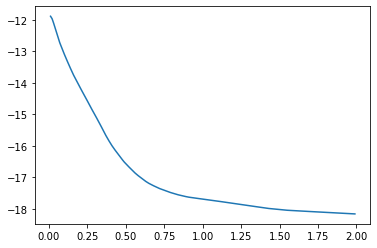

In [9]:
alpha = []
error = []

for i in range(1,200):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-7.250292950644506

In [11]:
# # tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', n_estimators=270)

In [12]:
print(gs.best_score_)
print(gs.best_estimator_)

-6.969678935772673
RandomForestRegressor(max_features='log2', n_estimators=270)
